In [17]:
from repliclust import Archetype
import pickle

with open("archetypes.pkl", "rb") as file:
    archetypes = pickle.load(file)

In [2]:
import numpy as np
from tqdm import tqdm
from overlap_approximations import compute_pairwise_overlaps

pw_overlaps_dict = {}

for arch in tqdm(archetypes):
    pw_overlaps_list = []
    for i in range(100):
        mm = arch.sample_mixture_model(quiet=True)
        axes_list = mm.axes_list
        axis_lengths_list = mm.axis_lengths_list
        centers = mm.centers

        cov = [ 
            np.transpose(axes) @ np.diag(axis_lengths**2) @ axes for (axes, axis_lengths) in zip(axes_list, axis_lengths_list)
        ]

        pw_overlaps = compute_pairwise_overlaps(centers, cov)

        pw_overlaps_list.append(pw_overlaps)
    all_overlaps = np.array(pw_overlaps_list).flatten()
    pw_overlaps_dict[arch.name] = all_overlaps

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [13:57<00:00, 139.56s/it]


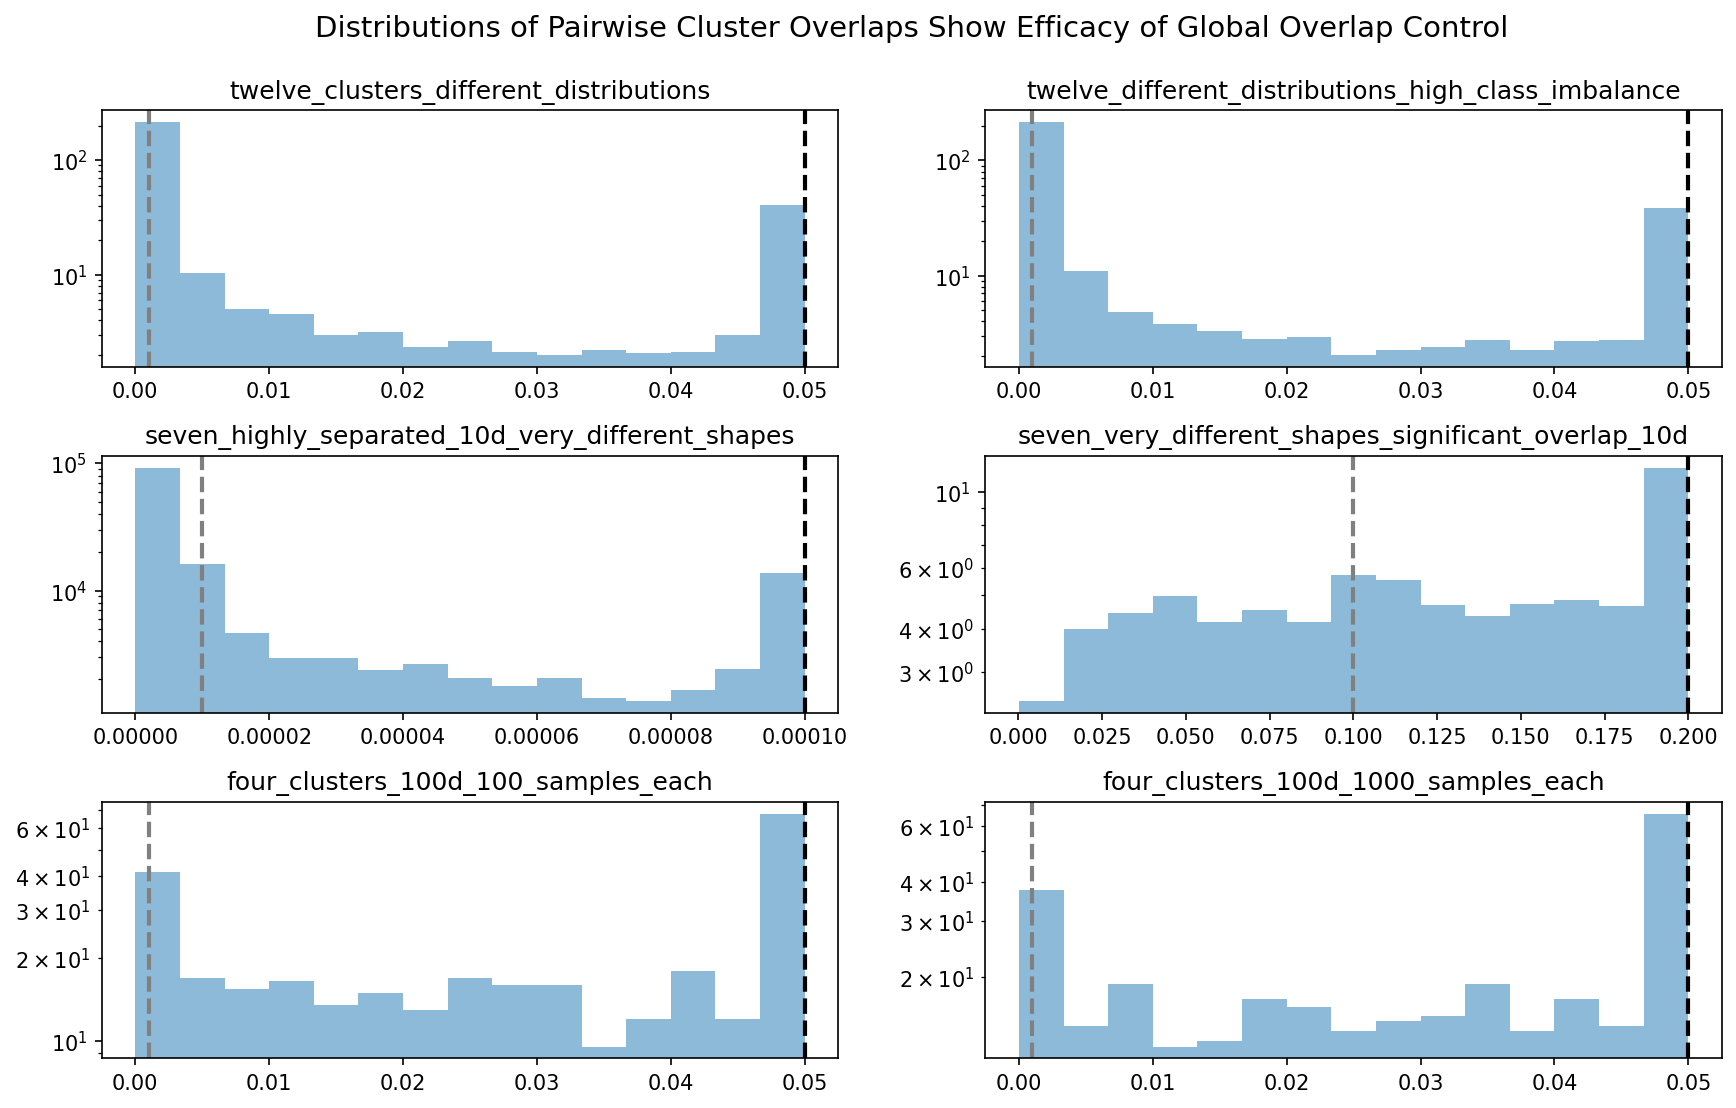

In [20]:
import matplotlib.pyplot as plt

n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8), dpi=150)
fig.suptitle("Distributions of Pairwise Cluster Overlaps Show Efficacy of Global Overlap Control",va='top', fontsize=14)

for i, (k,v) in enumerate(pw_overlaps_dict.items()):
    od = v
    arch = archetypes[i]
    assert k[:10] == arch.name[:10]

    axs[i // n_cols, i % n_cols].hist(od, bins=15, alpha=0.5, density=True)
    axs[i // n_cols, i % n_cols].set_title(arch.name)
    axs[i // n_cols, i % n_cols].set_yscale('log')
    axs[i // n_cols, i % n_cols].axvline(x=arch.min_overlap, linestyle='dashed', linewidth=2, color='gray')
    axs[i // n_cols, i % n_cols].axvline(x=arch.max_overlap, linestyle='dashed', linewidth=2, color='black')

plt.subplots_adjust(top=0.9, hspace=0.35, wspace=0.2, left=0.05, right=0.95)